<a href="https://colab.research.google.com/github/matheusanjos200203/Data_Analisys/blob/main/tratamento_EDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [320]:
file_path = '/content/Compilado_A1.xlsx'

In [327]:
import pandas as pd

def read_EDS(file_path):
    # Abrir o arquivo Excel
    Compilado = pd.ExcelFile(file_path)
    sheets_dict = {}  # Dicionário para armazenar os DataFrames de cada planilha

    # Iterar sobre as planilhas do arquivo Excel
    for Sheet_Name in Compilado.sheet_names:
        # Ler cada planilha como um DataFrame
        sheet_info = Compilado.parse(Sheet_Name)
        # Adicionar o DataFrame ao dicionário usando o nome da planilha como chave
        sheets_dict[Sheet_Name] = sheet_info

    # Concatenar os DataFrames das planilhas em um único DataFrame
    df = pd.concat(sheets_dict.values(), ignore_index=True)

    return df


In [322]:
def transform_to_numeric_fillna(df):
  # Iterando as colunas do dataframe
  for column in df.columns:
    # Realizando a verificação do tipo de dado gravado na coluna iterada
    if df[column].dtypes != 'float64':
      # Transformando os dados presententes na coluna para valores numérico
      df[column] = pd.to_numeric(df[column], errors = 'coerce')
  # Retornando o dataframe trocando os NaN por 0
  return df.fillna(0)

In [323]:
def add_mean_line(df):
  # Gerando um dataframe com a médias das colunas do dataframe principal
  mean = df.mean().to_frame().T
  # Alterando o nome do index deste datarame para média
  mean.index = ['Média']
  # Retornando um dataframe concatenando o dataframe principal tendo como a última linha a média das colunas
  return pd.concat([df, mean])

In [333]:
df = read_EDS(file_path)
df = transform_to_numeric_fillna(df)
df_perCent = df / 100

In [ ]:
df = add_mean_line(df)
df

In [336]:
df.to_excel('dataframe.xlsx', index = False)

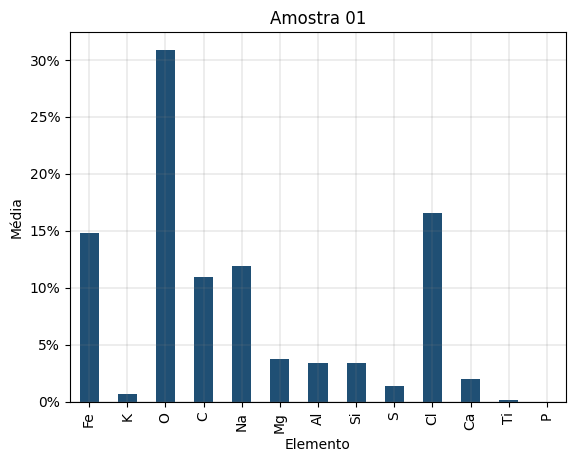

In [339]:
ax = df_perCent.mean().plot(kind = 'bar', width = 0.5, align = 'center', color = '#1F4F74')

plt.title('Amostra 01')
plt.xlabel('Elemento')
plt.ylabel('Média')

ax.yaxis.set_major_locator(ticker.FixedLocator(ax.get_yticks()))
ax.set_yticklabels(['{:.0f}%'.format(x*100) for x in ax.get_yticks()])

plt.grid(True, color = 'gray', linewidth = 0.2)

plt.show()